In [12]:
def evaluate_model(classifier, X_train, X_test, y_train, y_test, cv=5):
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    from sklearn.metrics import roc_auc_score, average_precision_score, matthews_corrcoef
    from sklearn.metrics import log_loss, balanced_accuracy_score, confusion_matrix, classification_report
    from sklearn.model_selection import learning_curve
    from sklearn.metrics import roc_curve, auc
    # Train the model
    classifier.fit(X_train, y_train)
    
    # Make predictions
    y_pred = classifier.predict(X_test)
    
    # Calculate and print metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    average_precision = average_precision_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    logloss = log_loss(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("AUC-ROC:", roc_auc)
    print("AUC-PR (Average Precision):", average_precision)
    print("Matthew's Correlation Coefficient (MCC):", mcc)
    print("Log Loss:", logloss)
    print("Balanced Accuracy:", balanced_acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()
    # Plot learning curve
    train_sizes, train_scores, test_scores = learning_curve(classifier, X_train, y_train, cv=cv, train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(8, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")
    plt.legend(loc="best")
    plt.show()
    

In [13]:
import pandas as pd

In [14]:
df=pd.read_csv("train10k.csv")

In [15]:
df.drop(columns=["name"],inplace=True)

In [16]:
df.head()

,cls,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,1,NaN,NaN,0,0,26.738640,2.408266,4.798534,26.738640,1.336932,...,9.775938,66.510483,264.101111,8.253160,764.0,28,102,119,5.055556,4.527778
1,1,NaN,NaN,0,0,17.305419,2.317107,4.585026,17.305419,1.331186,...,9.184920,56.970810,182.080376,7.916538,247.0,15,64,73,3.583333,2.972222
2,1,NaN,NaN,0,0,32.588813,2.408273,4.741441,32.588813,1.357867,...,10.003559,73.928484,318.148061,7.574954,1509.0,34,128,151,5.777778,5.277778
3,1,NaN,NaN,0,0,32.315833,2.434854,4.827387,32.315833,1.346493,...,10.098849,74.146649,322.142976,7.670071,1453.0,36,130,155,6.388889,5.277778
4,1,NaN,NaN,0,0,29.954829,2.574554,5.129759,29.954829,1.248118,...,10.424749,72.979657,335.173273,6.840271,1176.0,44,132,161,9.291667,5.236111


Handling NaN values

In [20]:
df=df.fillna(0)
df

,cls,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,1,0.0,0.0,0,0,26.738640,2.408266,4.798534,26.738640,1.336932,...,9.775938,66.510483,264.101111,8.253160,764.0,28,102,119,5.055556,4.527778
1,1,0.0,0.0,0,0,17.305419,2.317107,4.585026,17.305419,1.331186,...,9.184920,56.970810,182.080376,7.916538,247.0,15,64,73,3.583333,2.972222
2,1,0.0,0.0,0,0,32.588813,2.408273,4.741441,32.588813,1.357867,...,10.003559,73.928484,318.148061,7.574954,1509.0,34,128,151,5.777778,5.277778
3,1,0.0,0.0,0,0,32.315833,2.434854,4.827387,32.315833,1.346493,...,10.098849,74.146649,322.142976,7.670071,1453.0,36,130,155,6.388889,5.277778
4,1,0.0,0.0,0,0,29.954829,2.574554,5.129759,29.954829,1.248118,...,10.424749,72.979657,335.173273,6.840271,1176.0,44,132,161,9.291667,5.236111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9597,0,0.0,0.0,2,0,45.023457,2.466024,4.909949,45.023457,1.250652,...,10.460786,87.983658,494.187795,8.236463,3941.0,54,190,221,12.534722,7.736111
9598,0,0.0,0.0,0,0,31.179816,2.416831,4.706367,31.179816,1.299159,...,9.878324,73.901759,344.105545,8.602639,1515.0,32,122,141,7.277778,5.416667
9599,0,0.0,0.0,0,0,44.592643,2.481095,4.959735,44.592643,1.311548,...,10.617099,83.954184,484.166808,7.809142,3365.0,59,188,226,10.534722,7.222222
9600,0,0.0,0.0,0,0,41.490351,2.421027,4.835730,41.490351,1.338398,...,10.376019,80.628472,413.137556,8.262751,2691.0,49,168,199,7.861111,6.722222


In [22]:
# Check if any column contains negative values
columns_with_negative_values = (df < 0).any()

if columns_with_negative_values.any():
    print("The following columns contain negative values:")
    print(columns_with_negative_values[columns_with_negative_values].index.tolist())
else:
    print("No columns in your dataset contain negative values.")


The following columns contain negative values:
['ATSC1c', 'ATSC2c', 'ATSC3c', 'ATSC4c', 'ATSC5c', 'ATSC6c', 'ATSC7c', 'ATSC8c', 'ATSC1dv', 'ATSC2dv', 'ATSC3dv', 'ATSC4dv', 'ATSC5dv', 'ATSC6dv', 'ATSC7dv', 'ATSC8dv', 'ATSC1d', 'ATSC2d', 'ATSC3d', 'ATSC4d', 'ATSC5d', 'ATSC6d', 'ATSC7d', 'ATSC8d', 'ATSC1s', 'ATSC2s', 'ATSC3s', 'ATSC4s', 'ATSC5s', 'ATSC6s', 'ATSC7s', 'ATSC8s', 'ATSC1Z', 'ATSC2Z', 'ATSC3Z', 'ATSC4Z', 'ATSC5Z', 'ATSC6Z', 'ATSC7Z', 'ATSC8Z', 'ATSC1m', 'ATSC2m', 'ATSC3m', 'ATSC4m', 'ATSC5m', 'ATSC6m', 'ATSC7m', 'ATSC8m', 'ATSC1v', 'ATSC2v', 'ATSC3v', 'ATSC4v', 'ATSC5v', 'ATSC6v', 'ATSC7v', 'ATSC8v', 'ATSC1se', 'ATSC2se', 'ATSC3se', 'ATSC4se', 'ATSC5se', 'ATSC6se', 'ATSC7se', 'ATSC8se', 'ATSC1pe', 'ATSC2pe', 'ATSC3pe', 'ATSC4pe', 'ATSC5pe', 'ATSC6pe', 'ATSC7pe', 'ATSC8pe', 'ATSC1are', 'ATSC2are', 'ATSC3are', 'ATSC4are', 'ATSC5are', 'ATSC6are', 'ATSC7are', 'ATSC8are', 'ATSC1p', 'ATSC2p', 'ATSC3p', 'ATSC4p', 'ATSC5p', 'ATSC6p', 'ATSC7p', 'ATSC8p', 'ATSC1i', 'ATSC2i', 'ATSC3i', 'A

In [23]:
df = df.abs()


In [24]:
columns_with_negative_values = (df < 0).any()

if columns_with_negative_values.any():
    print("The following columns contain negative values:")
    print(columns_with_negative_values[columns_with_negative_values].index.tolist())
else:
    print("No columns in your dataset contain negative values.")

No columns in your dataset contain negative values.


# Naive Bayes (without preprocessing)

#### 1. Multinomial naive bayes

Accuracy: 0.5252472670484123
Precision: 0.5181179015684153
Recall: 0.9785495403472931
F1-Score: 0.6775106082036774
AUC-ROC: 0.5163448338679141
AUC-PR (Average Precision): 0.5179358407763357
Matthew's Correlation Coefficient (MCC): 0.08603845435214504
Log Loss: 17.11182295204312
Balanced Accuracy: 0.5163448338679141
Confusion Matrix:
[[ 51 891]
 [ 21 958]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.05      0.10       942
           1       0.52      0.98      0.68       979

    accuracy                           0.53      1921
   macro avg       0.61      0.52      0.39      1921
weighted avg       0.61      0.53      0.39      1921



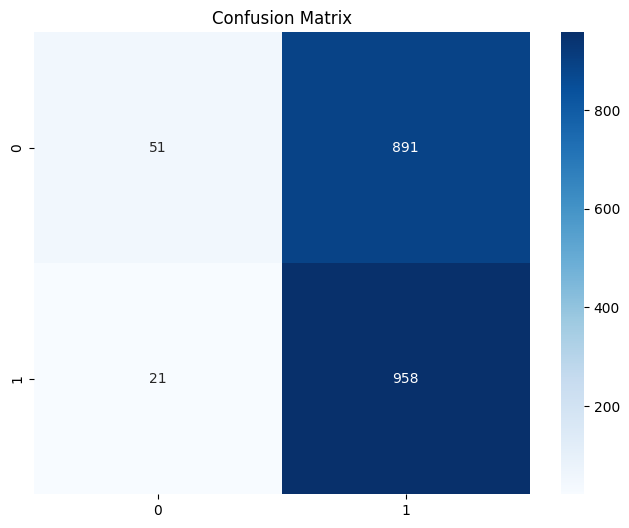

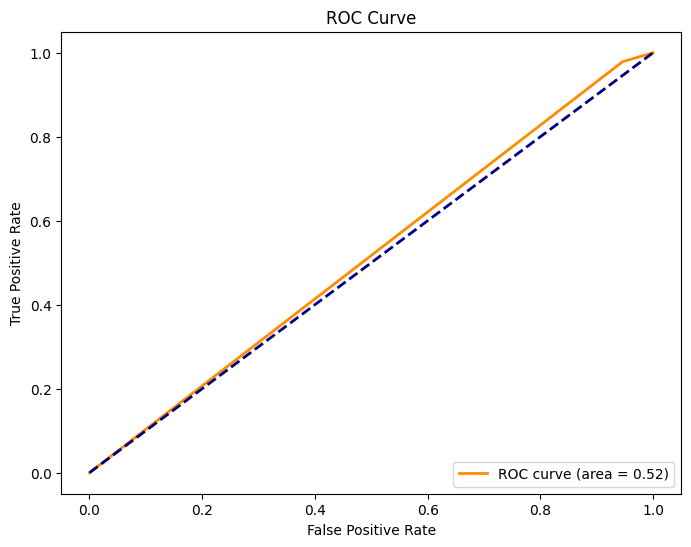

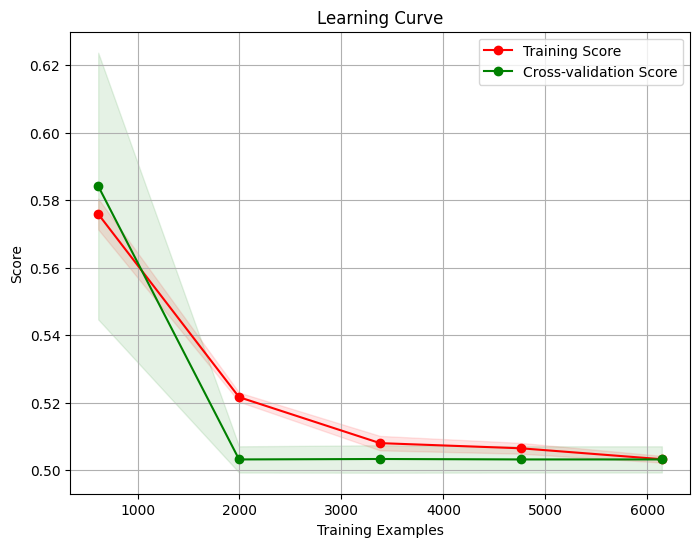

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
X=df.drop(columns=["cls"])
y=df['cls']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = MultinomialNB()
evaluate_model(classifier, X_train, X_test, y_train, y_test, cv=5)


#### 2.Gaussian Naive Bayes

Accuracy: 0.4888079125455492
Precision: 0.44
Recall: 0.011235955056179775
F1-Score: 0.021912350597609563
AUC-ROC: 0.49818697965123215
AUC-PR (Average Precision): 0.5088480367785972
Matthew's Correlation Coefficient (MCC): -0.01599411817821548
Log Loss: 18.425230415467485
Balanced Accuracy: 0.49818697965123215
Confusion Matrix:
[[928  14]
 [968  11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.99      0.65       942
           1       0.44      0.01      0.02       979

    accuracy                           0.49      1921
   macro avg       0.46      0.50      0.34      1921
weighted avg       0.46      0.49      0.33      1921



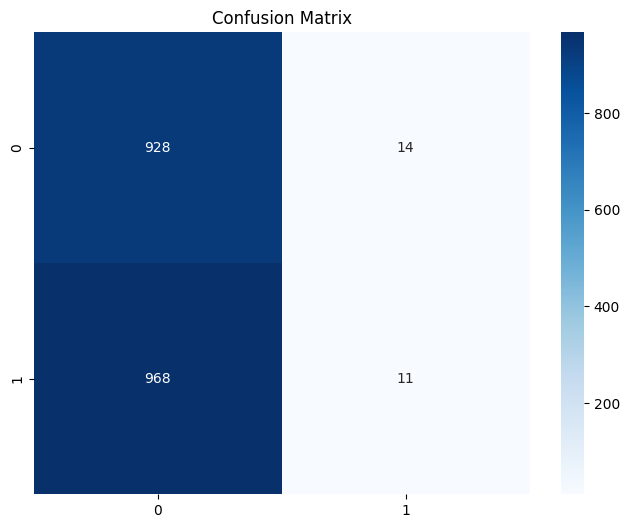

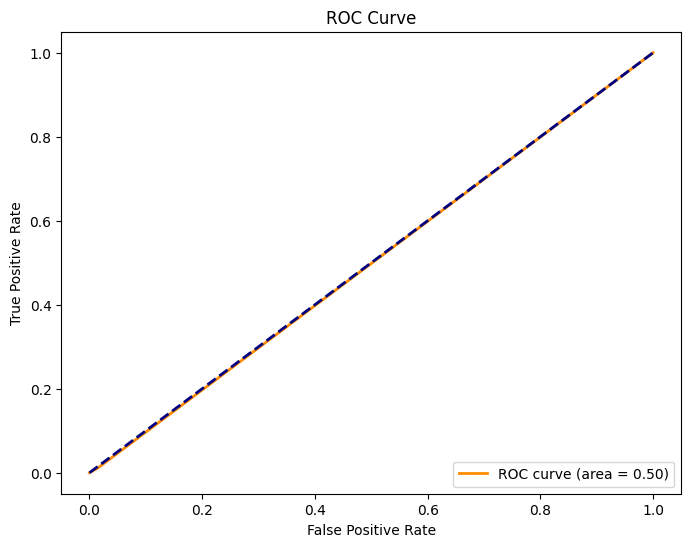

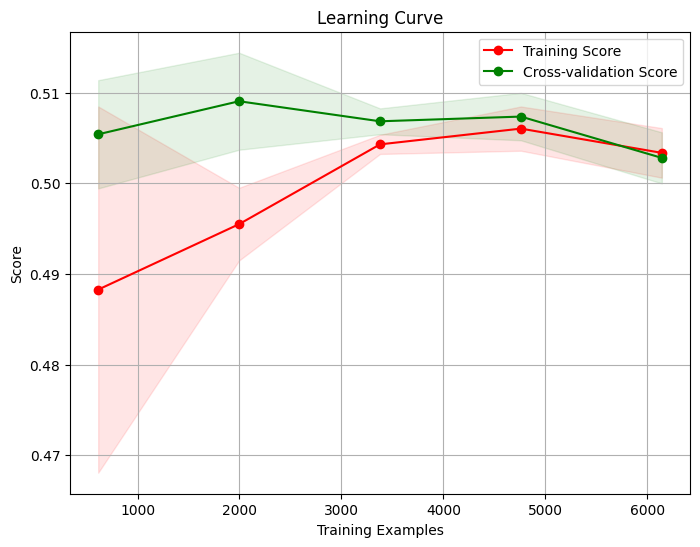

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X=df.drop(columns=["cls"])
y=df['cls']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = GaussianNB()
evaluate_model(classifier, X_train, X_test, y_train, y_test, cv=5)


#### 3.Bernoulli Naive Bayes

Accuracy: 0.7032795419052577
Precision: 0.6824264049955397
Recall: 0.7814096016343207
F1-Score: 0.7285714285714286
AUC-ROC: 0.7017451405199204
AUC-PR (Average Precision): 0.6446548576096306
Matthew's Correlation Coefficient (MCC): 0.4091683904732881
Log Loss: 10.69488934502695
Balanced Accuracy: 0.7017451405199204
Confusion Matrix:
[[586 356]
 [214 765]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.62      0.67       942
           1       0.68      0.78      0.73       979

    accuracy                           0.70      1921
   macro avg       0.71      0.70      0.70      1921
weighted avg       0.71      0.70      0.70      1921



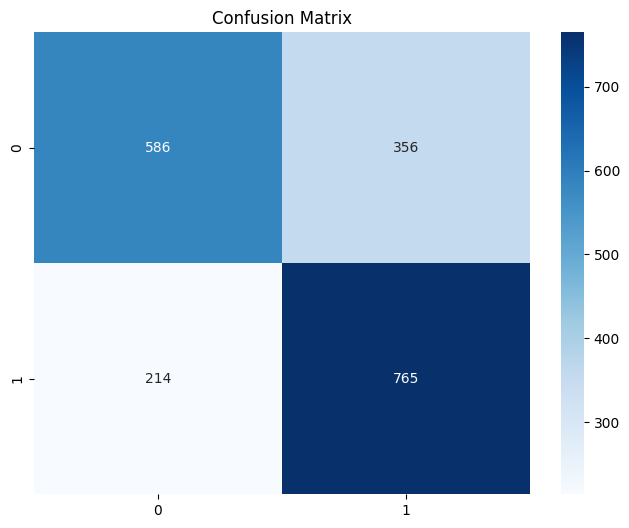

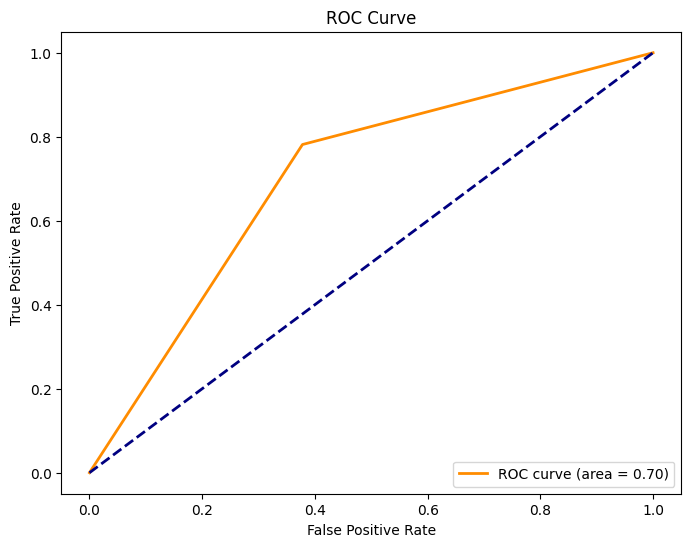

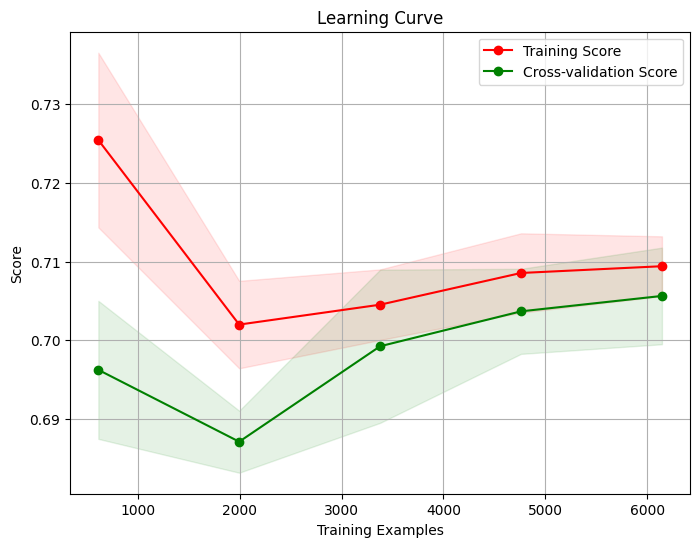

In [28]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
X=df.drop(columns=["cls"])
y=df['cls']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = BernoulliNB()
evaluate_model(classifier, X_train, X_test, y_train, y_test, cv=5)


# Naive Bayes (After pre-processing)

In [36]:
import pandas as pd
import numpy as np

# Set your threshold based on the Z-Score or IQR method
threshold = 2

# Loop through each numerical column in the DataFrame
for column_name in df.select_dtypes(include=[np.number]).columns:
    data = df[column_name]
    mean = data.mean()
    std = data.std()
    z_scores = (data - mean) / std

    lower_limit = df[column_name].mean() - threshold * df[column_name].std()
    upper_limit = df[column_name].mean() + threshold * df[column_name].std()
    
    # Replace outliers with the nearest non-outlier value (capping)
    df[column_name] = df[column_name].clip(lower_limit, upper_limit)


In [37]:
df.head()

,cls,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,1,0.0,0.0,0.0,0.0,26.738640,2.408266,4.798534,26.738640,1.336932,...,9.775938,66.510483,264.101111,8.253160,764.0,28.0,102.0,119.0,5.055556,4.527778
1,1,0.0,0.0,0.0,0.0,17.305419,2.317107,4.585026,17.305419,1.331186,...,9.371016,56.970810,182.080376,7.916538,247.0,15.0,64.0,73.0,3.583333,2.972222
2,1,0.0,0.0,0.0,0.0,32.588813,2.408273,4.741441,32.588813,1.357867,...,10.003559,73.928484,318.148061,7.574954,1509.0,34.0,128.0,151.0,5.777778,5.277778
3,1,0.0,0.0,0.0,0.0,32.315833,2.434854,4.827387,32.315833,1.346493,...,10.098849,74.146649,322.142976,7.670071,1453.0,36.0,130.0,155.0,6.388889,5.277778
4,1,0.0,0.0,0.0,0.0,29.954829,2.574554,5.129759,29.954829,1.248118,...,10.424749,72.979657,335.173273,6.840271,1176.0,44.0,132.0,161.0,9.291667,5.236111


In [41]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df)

scaled_df = pd.DataFrame(data=scaled_data, columns=df.columns)

In [42]:
df.head()

,cls,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,1.000208,0.0,0.0,-0.37153,-0.453509,-0.593900,0.094126,0.170408,-0.593900,0.557913,...,-0.985663,-0.422782,-1.280016,0.105078,-0.212160,-1.008698,-1.003269,-0.972622,-1.251156,-0.945090
1,1.000208,0.0,0.0,-0.37153,-0.453509,-1.586823,-0.236435,-0.223745,-1.586823,0.518000,...,-2.205946,-1.322217,-2.265200,-0.233076,-0.212161,-2.122481,-2.142646,-2.095488,-1.840620,-2.141750
2,1.000208,0.0,0.0,-0.37153,-0.453509,0.021878,0.094152,0.065009,0.021878,0.703337,...,-0.299700,0.276615,-0.630836,-0.576214,-0.212159,-0.494645,-0.223696,-0.191497,-0.961984,-0.368128
3,1.000208,0.0,0.0,-0.37153,-0.453509,-0.006855,0.190538,0.223673,-0.006855,0.624328,...,-0.012533,0.297185,-0.582851,-0.480664,-0.212159,-0.323294,-0.163729,-0.093857,-0.717301,-0.368128
4,1.000208,0.0,0.0,-0.37153,-0.453509,-0.255370,0.697117,0.781874,-0.255370,-0.059022,...,0.969606,0.187156,-0.426339,-1.314240,-0.212160,0.362111,-0.103762,0.052604,0.444945,-0.400182


In [45]:
from sklearn.decomposition import PCA
import pandas as pd
n_components = 2
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(df)
df = pd.DataFrame(data=pca_result, columns=[f'PC{i}' for i in range(1, n_components + 1)])



In [48]:
df.head()

,PC1,PC2
0,-18.698640,-2.045813
1,-35.915768,2.757794
2,-6.535398,2.532438
3,-5.173873,0.937035
4,2.859813,9.635270


#### 1.Multinomial

In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
X=df.drop(columns=["cls"])
y=df['cls']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = MultinomialNB()
evaluate_model(classifier, X_train, X_test, y_train, y_test, cv=5)


KeyError: "['cls'] not found in axis"

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X=df.drop(columns=["cls"])
y=df['cls']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = GaussianNB()
evaluate_model(classifier, X_train, X_test, y_train, y_test, cv=5)


KeyError: "['cls'] not found in axis"